In [1]:
import pandas as pd

df1 = pd.read_csv('Loc1_session1_group1_2025-04-18_15-50-49.csv')
df1['counts'] = df1['counts'] / 2
df1 = df1.head(92)

df2 = pd.read_csv('Loc2_session2_group2_2025-04-18_16-04-20.csv')
df2['counts'] = df2['counts'] / 5

display(df1.head())

display(df2.head())


,Time,Latitude,Longitude,counts,PM1,PM25,PM10,Temperature,Humidity,Pressure,Altitude,VOC
0,1.745017e+09,0,0,14.75,4.0,7.0,9.0,20.230293,54.232543,1001.236929,100.500564,49003.0
1,1.745017e+09,0,0,16.00,4.0,7.0,9.0,20.326680,53.961869,1001.231269,100.548143,68852.0
2,1.745017e+09,0,0,16.00,4.5,7.0,8.5,20.405293,53.698754,1001.223556,100.612981,81456.5
3,1.745017e+09,0,0,13.50,4.5,7.0,8.5,20.469844,53.459520,1001.218549,100.655074,89838.0
4,1.745017e+09,0,0,12.75,5.0,7.0,8.0,20.517402,53.224704,1001.216265,100.674271,96006.5


,Time,Latitude,Longitude,counts,PM1,PM25,PM10,Temperature,Humidity,Pressure,Altitude,VOC
0,1.745017e+09,0,0,2.96,5.0,7.0,8.0,18.640742,60.066530,1002.551761,89.453447,40298.0
1,1.745017e+09,0,0,3.08,4.5,6.5,8.5,18.265645,59.595606,1003.433249,82.053639,77353.0
2,1.745017e+09,0,0,3.12,4.0,6.0,8.0,18.121113,59.151351,1003.783661,79.113533,106116.0
3,1.745017e+09,0,0,3.04,4.0,6.0,8.0,18.153828,58.979832,1003.837278,78.663739,118302.5
4,1.745017e+09,0,0,3.20,4.0,5.5,7.5,18.234785,58.795510,1003.852480,78.536211,127431.5


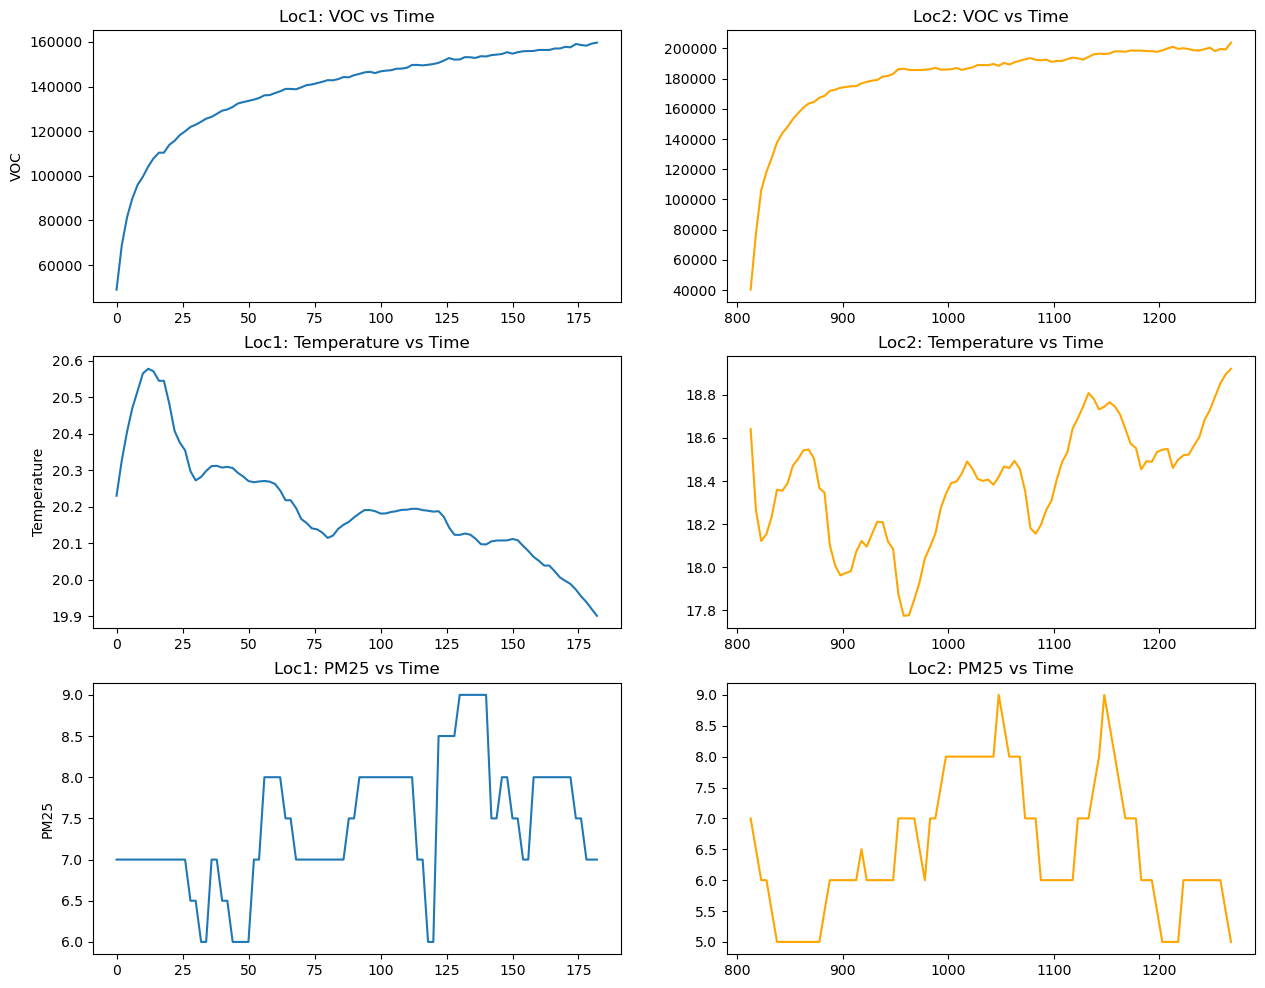

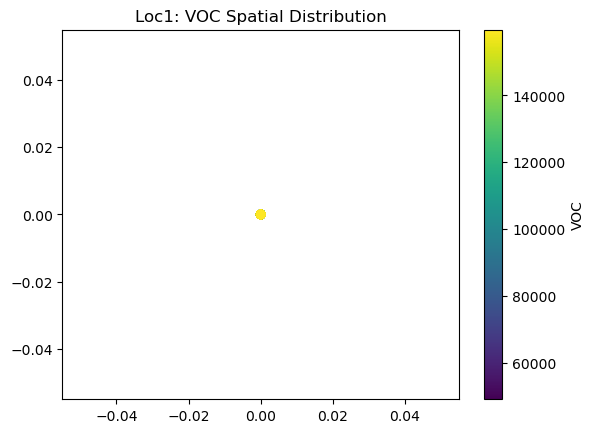

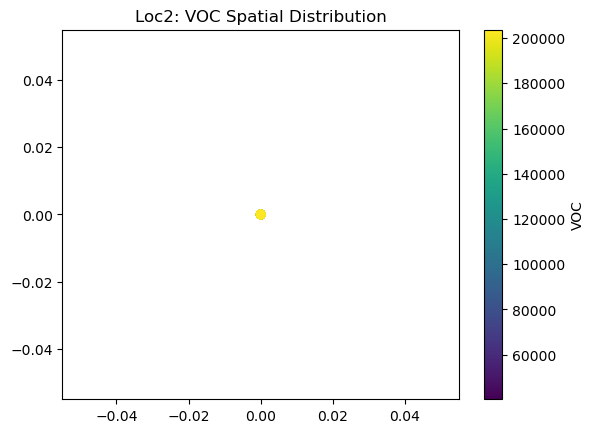

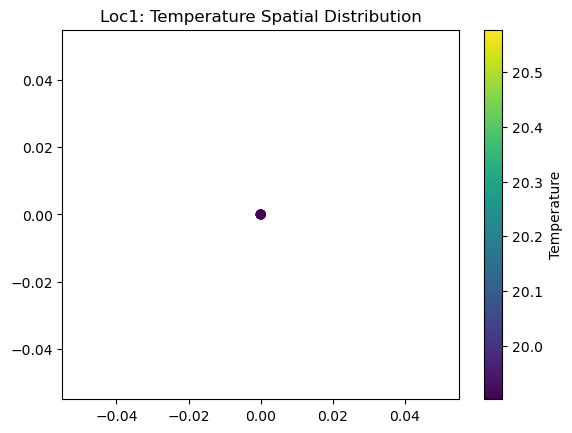

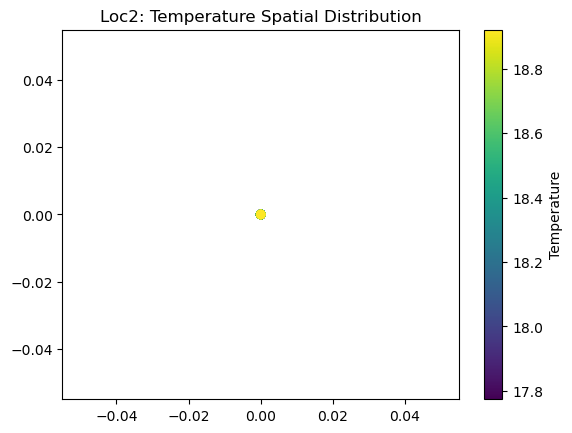

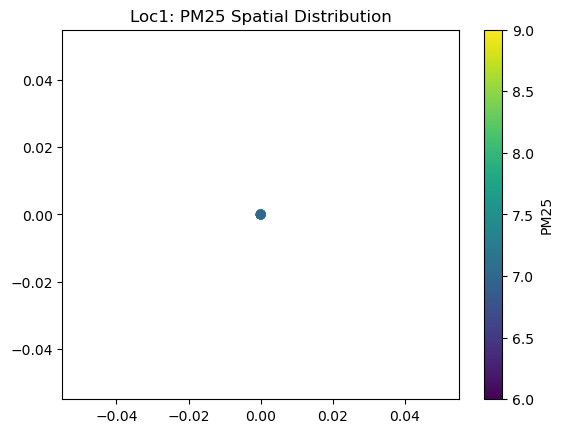

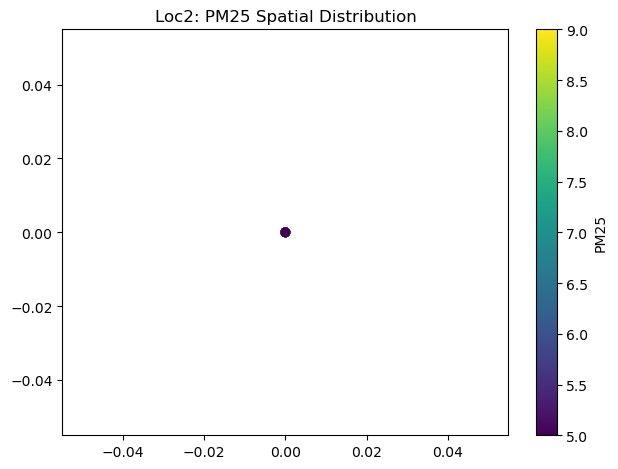

In [2]:
import matplotlib.pyplot as plt


df1 = pd.read_csv('Loc1_session1_group1_2025-04-18_15-50-49.csv')
df1['counts'] = df1['counts'] / 2
df1 = df1.head(92)

df2 = pd.read_csv('Loc2_session2_group2_2025-04-18_16-04-20.csv')
df2['counts'] = df2['counts'] / 5


min_time = min(df1['Time'].min(), df2['Time'].min())
df1['Time_sec'] = df1['Time'] - min_time
df2['Time_sec'] = df2['Time'] - min_time


fig, axs = plt.subplots(3, 2, figsize=(15, 12))
metrics = ['VOC', 'Temperature', 'PM25']

for i, metric in enumerate(metrics):
    
    axs[i,0].plot(df1['Time_sec'], df1[metric], label='Loc1')
    axs[i,1].plot(df2['Time_sec'], df2[metric], label='Loc2', color='orange')
    axs[i,0].set_ylabel(metric)
    axs[i,0].set_title(f'Loc1: {metric} vs Time')
    axs[i,1].set_title(f'Loc2: {metric} vs Time')
    
    
    plt.figure()
    plt.scatter(df1['Longitude'], df1['Latitude'], c=df1[metric], cmap='viridis')
    plt.colorbar(label=metric)
    plt.title(f'Loc1: {metric} Spatial Distribution')
    
    plt.figure()
    plt.scatter(df2['Longitude'], df2['Latitude'], c=df2[metric], cmap='viridis')
    plt.colorbar(label=metric)
    plt.title(f'Loc2: {metric} Spatial Distribution')

plt.tight_layout()
plt.show()


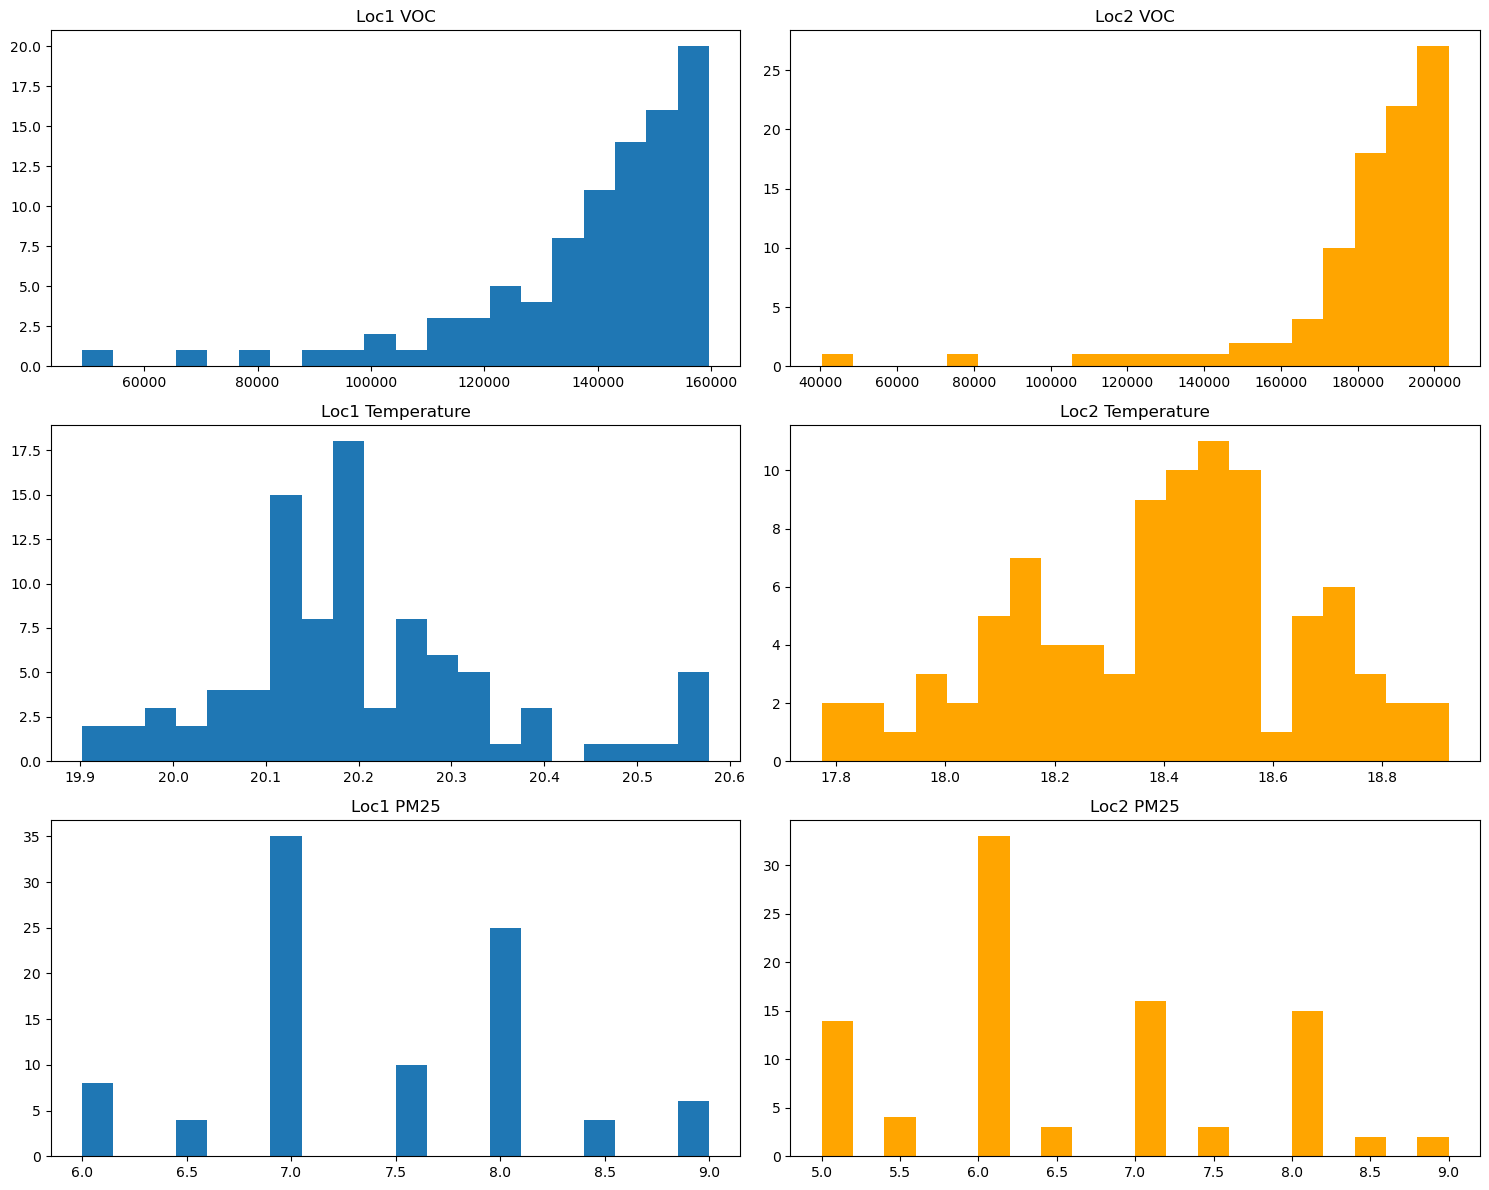

""


In [3]:
from scipy.stats import normaltest
import numpy as np
fig, axs = plt.subplots(3, 2, figsize=(15, 12))
stats = {}

for i, metric in enumerate(['VOC', 'Temperature', 'PM25']):
    
    axs[i,0].hist(df1[metric], bins=20)
    axs[i,0].set_title(f'Loc1 {metric}')
    
    axs[i,1].hist(df2[metric], bins=20, color='orange')
    axs[i,1].set_title(f'Loc2 {metric}')
    

plt.tight_layout()
plt.show()


pd.DataFrame(stats).T

In [4]:
columns = ['counts', 'PM1', 'PM25', 'PM10', 'Temperature', 'Humidity', 'Pressure', 'Altitude', 'VOC']
print("Loc1 (df1):")
for col in columns:
    mean = df1[col].mean()
    std = df1[col].std()
   
    stat, p = normaltest(df1[col].dropna())
    is_normal = p > 0.05
    print(f"{col}: mean={mean:.3f}, std={std:.3f}, normal={is_normal}")

print("\nLoc2 (df2):")
for col in columns:
    mean = df2[col].mean()
    std = df2[col].std()
    stat, p = normaltest(df2[col].dropna())
    is_normal = p > 0.05
    print(f"{col}: mean={mean:.3f}, std={std:.3f}, normal={is_normal}")


Loc1 (df1):
counts: mean=16.761, std=2.249, normal=True
PM1: mean=4.196, std=0.529, normal=True
PM25: mean=7.413, std=0.769, normal=True
PM10: mean=7.576, std=0.808, normal=True
Temperature: mean=20.202, std=0.147, normal=False
Humidity: mean=53.581, std=0.660, normal=False
Pressure: mean=1001.234, std=0.014, normal=False
Altitude: mean=100.529, std=0.118, normal=False
VOC: mean=138668.217, std=20811.559, normal=False

Loc2 (df2):
counts: mean=3.090, std=0.331, normal=True
PM1: mean=4.054, std=0.866, normal=False
PM25: mean=6.511, std=1.074, normal=False
PM10: mean=7.060, std=1.097, normal=False
Temperature: mean=18.393, std=0.264, normal=True
Humidity: mean=57.855, std=0.653, normal=False
Pressure: mean=1003.809, std=0.140, normal=False
Altitude: mean=78.900, std=1.179, normal=False
VOC: mean=181550.984, std=26032.398, normal=False


In [5]:

mean_counts1 = df1['counts'].mean()
std_counts1 = df1['counts'].std()
expected_std1 = np.sqrt(mean_counts1)

print("Loc1 (df1):")
print(f"Mean counts: {mean_counts1:.2f}")
print(f"Measured standard deviation: {std_counts1:.2f}")
print(f"Expected standard deviation (Poisson): {expected_std1:.2f}")
print(f"Ratio (Measured / Expected): {std_counts1/expected_std1:.2f}\n")


mean_counts2 = df2['counts'].mean()
std_counts2 = df2['counts'].std()
expected_std2 = np.sqrt(mean_counts2)

print("Loc2 (df2):")
print(f"Mean counts: {mean_counts2:.2f}")
print(f"Measured standard deviation: {std_counts2:.2f}")
print(f"Expected standard deviation (Poisson): {expected_std2:.2f}")
print(f"Ratio (Measured / Expected): {std_counts2/expected_std2:.2f}")


Loc1 (df1):
Mean counts: 16.76
Measured standard deviation: 2.25
Expected standard deviation (Poisson): 4.09
Ratio (Measured / Expected): 0.55

Loc2 (df2):
Mean counts: 3.09
Measured standard deviation: 0.33
Expected standard deviation (Poisson): 1.76
Ratio (Measured / Expected): 0.19


In [6]:
def std_uncertainty(std_dev, n_samples):
    return std_dev / np.sqrt(2 * np.sqrt(n_samples))


mean1 = df1['counts'].mean()
std1 = df1['counts'].std()
n1 = len(df1)
expected_std1 = np.sqrt(mean1) 
uncertainty1 = std_uncertainty(std1, n1)


mean2 = df2['counts'].mean()
std2 = df2['counts'].std()
n2 = len(df2)
expected_std2 = np.sqrt(mean2)
uncertainty2 = std_uncertainty(std2, n2)

print("d. Uncertainty Analysis using Central Limit Theorem\n")
print(f"Location 1 Data:")
print(f"  Mean counts: {mean1:.2f}")
print(f"  Measured std dev: {std1:.2f} ± {uncertainty1:.2f}")
print(f"  Expected std dev (√N): {expected_std1:.2f}")
print(f"  Statistical agreement: {abs(std1-expected_std1) <= 2*uncertainty1}")

print(f"\nLocation 2 Data:")
print(f"  Mean counts: {mean2:.2f}")
print(f"  Measured std dev: {std2:.2f} ± {uncertainty2:.2f}")
print(f"  Expected std dev (√N): {expected_std2:.2f}")
print(f"  Statistical agreement: {abs(std2-expected_std2) <= 2*uncertainty2}")

# e.
var1 = std1**2
expected_var1 = mean1  
var_uncertainty1 = 2 * std1 * uncertainty1

var2 = std2**2
expected_var2 = mean2
var_uncertainty2 = 2 * std2 * uncertainty2

print("\ne. Variance Analysis and Implications\n")
print(f"Location 1 Variance Analysis:")
print(f"  Measured variance: {var1:.2f} ± {var_uncertainty1:.2f}")
print(f"  Expected variance (N): {expected_var1:.2f}")
print(f"  Variance ratio: {var1/expected_var1:.2f}")

print(f"\nLocation 2 Variance Analysis:")
print(f"  Measured variance: {var2:.2f} ± {var_uncertainty2:.2f}")
print(f"  Expected variance (N): {expected_var2:.2f}")
print(f"  Variance ratio: {var2/expected_var2:.2f}")


d. Uncertainty Analysis using Central Limit Theorem

Location 1 Data:
  Mean counts: 16.76
  Measured std dev: 2.25 ± 0.51
  Expected std dev (√N): 4.09
  Statistical agreement: False

Location 2 Data:
  Mean counts: 3.09
  Measured std dev: 0.33 ± 0.08
  Expected std dev (√N): 1.76
  Statistical agreement: False

e. Variance Analysis and Implications

Location 1 Variance Analysis:
  Measured variance: 5.06 ± 2.31
  Expected variance (N): 16.76
  Variance ratio: 0.30

Location 2 Variance Analysis:
  Measured variance: 0.11 ± 0.05
  Expected variance (N): 3.09
  Variance ratio: 0.04


In [7]:
print("The radiation counts do not follow pure Poisson statistics, which would be expected from random, independent decay events")

The radiation counts do not follow pure Poisson statistics, which would be expected from random, independent decay events


In [8]:
def sigma_sqrtN(N, N_samples):
    return np.sqrt(N) / np.sqrt(2 * np.sqrt(N_samples))

mean_counts1 = df1['counts'].mean()
n_samples1 = len(df1)
uncertainty1 = sigma_sqrtN(mean_counts1, n_samples1)

mean_counts2 = df2['counts'].mean()
n_samples2 = len(df2)
uncertainty2 = sigma_sqrtN(mean_counts2, n_samples2)

print(f"Loc1: σ_sqrtN = {uncertainty1:.3f}")
print(f"Loc2: σ_sqrtN = {uncertainty2:.3f}")


Loc1: σ_sqrtN = 0.935
Loc2: σ_sqrtN = 0.401


In [9]:
print("While the radiation counts at Location 1 are significantly higher than Location 2 from a statistical perspective, the absolute difference is too small to have any meaningful health implications.")

While the radiation counts at Location 1 are significantly higher than Location 2 from a statistical perspective, the absolute difference is too small to have any meaningful health implications.
